<a href="https://colab.research.google.com/github/PAminai/fNIRS_Motor_Imaginery/blob/main/1D_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from sklearn.model_selection import train_test_split
import scipy.io
from random import shuffle
import pandas as pd
from keras import backend as K
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data :

In [ ]:
labels = np.loadtxt(open("/content/drive/MyDrive/fNIRS/labels.csv", "rb"), delimiter=",")
#labels = np.loadtxt(open("/content/drive/MyDrive/fNIRs Competition 2022/Dataset/labels.csv", "rb"), delimiter=",")

mat = scipy.io.loadmat('/content/drive/MyDrive/fNIRS/x_Train_Hb.mat')
#mat = scipy.io.loadmat('/content/drive/MyDrive/fNIRs Competition 2022/Dataset/x_Train_Hb.mat')
x_Hb_orig = mat['x_Train_Hb']

mat = scipy.io.loadmat('/content/drive/MyDrive/fNIRS/x_Train_Hbo.mat')
#mat = scipy.io.loadmat('/content/drive/MyDrive/fNIRs Competition 2022/Dataset/x_Train_Hbo.mat')
x_Hbo_orig = mat['x_Train_Hbo']

In [ ]:
#Withaout Normalization
x_Hbo = x_Hbo_orig
x_Hb = x_Hb_orig

In [ ]:
#Normalization
#x_Hbo = (x_Hbo_orig-np.min(x_Hbo_orig))/(np.max(x_Hbo_orig)-np.min(x_Hbo_orig)) 
#x_Hb = (x_Hb_orig-np.min(x_Hb_orig))/(np.max(x_Hb_orig)-np.min(x_Hb_orig))

In [ ]:
# making a vector for all labels
y = np.zeros((800,1))
for i in range(20):
  y[i*40:(i+1)*40,0] = labels[:,i]

In [ ]:
# make a one_hot vector related to labels vrctor
y = y.astype(int)  
y_list = (y[:,0]-1).tolist()
one_hot_y = tf.one_hot(y_list, 2)  

In [ ]:
# make a total matrix (with 66 columns) concatenating two matrix (everyone 33 columns) ; Hbo and Hb
x_total = np.concatenate((x_Hbo,x_Hb),axis=2)

In [ ]:
plt.imshow(x_total[13])

## Preparing Data as row signals

In [ ]:
# overlook this cell
one_person_labels = one_hot_y.numpy()[160:200]  # work on a single person data
one_person_signals = x_total[160:200,:,:]

In [ ]:
# making train and test data just for one person
All_subjects_X_train = {}
All_subjects_X_test = {}
All_subjects_X_val = {}
All_subjects_y_train = {}
All_subjects_y_test = {}
All_subjects_y_val = {}
for i in range(20):
  one_person_labels = one_hot_y.numpy()[i*40:(i+1)*40]  # work on a single person data
  one_person_signals = x_total[i*40:(i+1)*40,:,:]
  X_train, X_test_val, y_train, y_test_val = train_test_split(one_person_signals, one_person_labels, test_size=0.3, random_state=42)
  X_test , X_val , y_test , y_val = train_test_split(X_test_val, y_test_val, test_size=0.66, random_state=0)
  All_subjects_X_train[str(i)] = X_train
  All_subjects_X_test[str(i)] = X_test
  All_subjects_X_val[str(i)] = X_val
  All_subjects_y_train[str(i)] = y_train
  All_subjects_y_test[str(i)] = y_test
  All_subjects_y_val[str(i)] = y_val

In [ ]:
LX_train = np.ndarray((0,100,66))
LX_test = np.ndarray((0,100,66))
LX_val = np.ndarray((0,100,66))
Ly_train = np.ndarray((0,2))
Ly_test = np.ndarray((0,2))
Ly_val = np.ndarray((0,2))
for i in range(20):
  LX_train = np.concatenate((LX_train,All_subjects_X_train[str(i)]),axis=0)
  LX_test = np.concatenate((LX_test,All_subjects_X_test[str(i)]),axis=0)
  LX_val = np.concatenate((LX_val,All_subjects_X_val[str(i)]),axis=0)
  Ly_train = np.concatenate((Ly_train,All_subjects_y_train[str(i)]),axis=0)
  Ly_test = np.concatenate((Ly_test,All_subjects_y_test[str(i)]),axis=0)
  Ly_val = np.concatenate((Ly_val,All_subjects_y_val[str(i)]),axis=0)

In [ ]:
# overlook this cell
# shuffeling data
X = np.zeros((560,100,66))
Y = np.zeros((560,2))
permutation = np.random.permutation(560)
for old_index , new_index in enumerate(permutation):
  X[new_index,:,:] = LX_train[old_index,:,:]
  Y[new_index] = Ly_train[old_index,:]
LX_train = X
Ly_train = Y

## Preaparing matrices as image 

In [ ]:
# making train and test data just for one person
All_subjects_X_train = {}
All_subjects_X_test = {}
All_subjects_X_val = {}
All_subjects_y_train = {}
All_subjects_y_test = {}
All_subjects_y_val = {}
for i in range(20):
  one_person_labels = one_hot_y.numpy()[i*40:(i+1)*40]  # work on a single person data
  one_person_signals = x_total[i*40:(i+1)*40,:,:].reshape(40,100,66,1)
  X_train, X_test_val, y_train, y_test_val = train_test_split(one_person_signals, one_person_labels, test_size=0.3, random_state=42)
  X_test , X_val , y_test , y_val = train_test_split(X_test_val, y_test_val, test_size=0.66, random_state=0)
  All_subjects_X_train[str(i)] = X_train
  All_subjects_X_test[str(i)] = X_test
  All_subjects_X_val[str(i)] = X_val
  All_subjects_y_train[str(i)] = y_train
  All_subjects_y_test[str(i)] = y_test
  All_subjects_y_val[str(i)] = y_val

In [ ]:
LX_train = np.ndarray((0,100,66,1))
LX_test = np.ndarray((0,100,66,1))
LX_val = np.ndarray((0,100,66,1))
Ly_train = np.ndarray((0,2))
Ly_test = np.ndarray((0,2))
Ly_val = np.ndarray((0,2))
for i in range(20):
  LX_train = np.concatenate((LX_train,All_subjects_X_train[str(i)]),axis=0)
  LX_test = np.concatenate((LX_test,All_subjects_X_test[str(i)]),axis=0)
  LX_val = np.concatenate((LX_val,All_subjects_X_val[str(i)]),axis=0)
  Ly_train = np.concatenate((Ly_train,All_subjects_y_train[str(i)]),axis=0)
  Ly_test = np.concatenate((Ly_test,All_subjects_y_test[str(i)]),axis=0)
  Ly_val = np.concatenate((Ly_val,All_subjects_y_val[str(i)]),axis=0)

## Time-Frequency Plot

In [ ]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()
import matplotlib.pyplot as plt
import imageio
from PIL import Image

In [ ]:
p = 13
T_F_X = {}
for trial in range(28):
  print('number of trial = ',trial)
  T_F_X[str(trial)] = np.ndarray((218, 337,33))
  for ch in tqdm(range(33)):
    x= All_subjects_X_train[str(p)][trial,:,ch]
    img = plt.specgram(x, Fs=10, NFFT=20, noverlap=15)[3]
    ar = img.figure
    ar.canvas.draw ()
    w,h = ar.canvas.get_width_height()
    buf = np.fromstring ( ar.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape =( h, w,4 ) 
    buf = np.roll(buf, 3, axis = 2 )
    I = Image.frombytes( "RGBA", ( w ,h ), buf.tostring())
    gray_image=I.convert('L')
    gray_image_array=np.asarray(gray_image)
    gray_image_array = gray_image_array[35:-35,53:-42]
    T_F_X[str(trial)][:,:,ch]=gray_image_array

In [ ]:
T_F_X_2 = {}
for trial in range(8):
  print('number of trial = ',trial)
  T_F_X_2[str(trial)] = np.ndarray((218, 337,33))
  for ch in tqdm(range(33)):
    x= All_subjects_X_val[str(p)][trial,:,ch]
    img = plt.specgram(x, Fs=10, NFFT=20, noverlap=15)[3]
    ar = img.figure
    ar.canvas.draw ()
    w,h = ar.canvas.get_width_height()
    buf = np.fromstring ( ar.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape =( h, w,4 ) 
    buf = np.roll(buf, 3, axis = 2 )
    I = Image.frombytes( "RGBA", ( w ,h ), buf.tostring())
    gray_image=I.convert('L')
    gray_image_array=np.asarray(gray_image)
    gray_image_array = gray_image_array[35:-35,53:-42]
    T_F_X_2[str(trial)][:,:,ch]=gray_image_array

In [ ]:
T_F_X_train = np.ndarray((0,218,337,33))
for i in range(28):
  T_F_X_train = np.concatenate((T_F_X_train,T_F_X[str(i)].reshape(1,218,337,33)),axis=0)

In [ ]:
T_F_X_val = np.ndarray((0,218,337,33))
for i in range(8):
  T_F_X_val = np.concatenate((T_F_X_val,T_F_X_2[str(i)].reshape(1,218,337,33)),axis=0)

In [ ]:
plt.imshow(T_F_X_train[25,:,:,19])

In [ ]:
df = pd.DataFrame(T_F_X_train)
df.to_csv('/content/drive/MyDrive/fNIRS/13th_person_TF_train.csv')
df = pd.DataFrame(T_F_X_val)
df.to_csv('/content/drive/MyDrive/fNIRS/13th_person_TF_val.csv')

## Model Functions

Model :

In [ ]:
def identity_block(x, filter,length):

  # copy tensor to variable called x_skip
  x_skip = x
  # Layer 1
  x = tf.keras.layers.Conv1D(filter, length,strides = 1, padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization(axis=1)(x)
  x = tf.keras.layers.Activation('relu')(x) # relu ==> 
  # Layer 2
  x = tf.keras.layers.Conv1D(filter, length,strides = 1,padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization(axis=1)(x)
  x = tf.keras.layers.Activation('relu')(x)
  # Layer 3
  x = tf.keras.layers.Conv1D(filter, length,strides = 1,padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization(axis=1)(x)
  x = tf.keras.layers.Activation('relu')(x)
  # Add Residue
  x = tf.keras.layers.Add()([x, x_skip])     
  return x

In [ ]:
def Our_ResNet(shape = (100,66), classes = 2):  # 33 ==> 66

  # Step 1 (Setup Input Layer)
  x_input = tf.keras.layers.Input(shape)
  x = tf.keras.layers.Conv1D(64, 1,strides = 1,input_shape=shape, padding = 'same')(x_input)   # 33 ==> 66
  # Step 2 identity layers
  x = identity_block(x,64,8)
  x = tf.keras.layers.Conv1D(128, 1,strides = 1, padding = 'same')(x)
  x = identity_block(x,128,5)
  x = tf.keras.layers.Conv1D(128,1,strides = 1, padding = 'same')(x)
  x = identity_block(x,128,3)
  # step 3 GAP and flatten layer
  x = tf.keras.layers.GlobalAveragePooling1D()(x)
  x = tf.keras.layers.Flatten()(x)
  # Step 4 End Dense Network
  x = tf.keras.layers.Dense(2, activation = 'sigmoid')(x)
  model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "Our_ResNet")
  return model

In [ ]:
def Our_ResNet_With_Dropout(shape = (100,33), classes = 2):
  # Step 1 (Setup Input Layer)
  x_input = tf.keras.layers.Input(shape)
  x = tf.keras.layers.Conv1D(64, 1,strides = 1,input_shape=shape, padding = 'same')(x_input)
  # Step 2 identity layers
  x = identity_block(x,64,8)
  x = tf.keras.layers.Conv1D(128, 1,strides = 1, padding = 'same')(x)
  x = identity_block(x,128,5)
  x = tf.keras.layers.Conv1D(128,1,strides = 1, padding = 'same')(x)
  x = identity_block(x,128,3)
  # step 3 GAP and flatten layer
  x = tf.keras.layers.GlobalAveragePooling1D()(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  # Step 4 End Dense Network
  x = tf.keras.layers.Dense(2, activation = 'sigmoid')(x)
  model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "Our_ResNet")
  return model

## Model Functions - 2D


Model :

In [ ]:
def identity_block(x, filter,length):

  # copy tensor to variable called x_skip
  x_skip = x
  # Layer 1
  x = tf.keras.layers.Conv2D(filter, length,strides = 1, padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization(axis=1)(x)
  x = tf.keras.layers.Activation('relu')(x) # relu ==> 
  # Layer 2
  x = tf.keras.layers.Conv2D(filter, length,strides = 1,padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization(axis=1)(x)
  x = tf.keras.layers.Activation('relu')(x)
  # Layer 3
  x = tf.keras.layers.Conv2D(filter, length,strides = 1,padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization(axis=1)(x)
  x = tf.keras.layers.Activation('relu')(x)
  # Add Residue
  x = tf.keras.layers.Add()([x, x_skip])     
  return x

In [ ]:
def Our_ResNet(shape = (100,66), classes = 2):  # 33 ==> 66

  # Step 1 (Setup Input Layer)
  x_input = tf.keras.layers.Input(shape)
  x = tf.keras.layers.Conv2D(64, 1,strides = 1,input_shape=shape, padding = 'same')(x_input)   # 33 ==> 66
  # Step 2 identity layers
  x = identity_block(x,64,8)
  x = tf.keras.layers.Conv2D(128, 1,strides = 1, padding = 'same')(x)
  x = identity_block(x,128,5)
  x = tf.keras.layers.Conv2D(128,1,strides = 1, padding = 'same')(x)
  x = identity_block(x,128,3)
  # step 3 GAP and flatten layer
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Flatten()(x)
  # Step 4 End Dense Network
  x = tf.keras.layers.Dense(2, activation = 'sigmoid')(x)
  model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "Our_ResNet")
  return model

In [ ]:
def Our_ResNet_With_Dropout(shape = (100,33), classes = 2):
  # Step 1 (Setup Input Layer)
  x_input = tf.keras.layers.Input(shape)
  x = tf.keras.layers.Conv2D(64, 1,strides = 1,input_shape=shape, padding = 'same')(x_input)
  # Step 2 identity layers
  x = identity_block(x,64,8)
  x = tf.keras.layers.Conv2D(128, 1,strides = 1, padding = 'same')(x)
  x = identity_block(x,128,5)
  x = tf.keras.layers.Conv2D(128,1,strides = 1, padding = 'same')(x)
  x = identity_block(x,128,3)
  # step 3 GAP and flatten layer
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dropout(0.4)(x)
  # Step 4 End Dense Network
  x = tf.keras.layers.Dense(2, activation = 'sigmoid')(x)
  model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "Our_ResNet")
  return model

## make model and train


In [ ]:
# person number
p = 13

In [ ]:
model = Our_ResNet_With_Dropout(shape = (100,66))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
model.summary()

In [ ]:
sh = T_F_X_train[0].shape

In [ ]:
model = Our_ResNet(shape = sh)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(T_F_X_train,All_subjects_y_train[str(p)],validation_data=(T_F_X_val,All_subjects_y_val[str(p)]),epochs=10, batch_size=8, verbose=1)

Epoch 1/10
4/4 [==============================] - 741s 180s/step - loss: 68.3322 - accuracy: 0.5357 - val_loss: 110.9954 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 740s 179s/step - loss: 7.2000 - accuracy: 0.4643 - val_loss: 85.7075 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 741s 180s/step - loss: 12.4892 - accuracy: 0.5357 - val_loss: 8.3450 - val_accuracy: 0.3750
Epoch 4/10
4/4 [==============================] - 746s 181s/step - loss: 11.8116 - accuracy: 0.5357 - val_loss: 22.7371 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 740s 182s/step - loss: 14.4692 - accuracy: 0.6429 - val_loss: 5.8825 - val_accuracy: 0.2500
Epoch 6/10
4/4 [==============================] - 749s 182s/step - loss: 14.3827 - accuracy: 0.3929 - val_loss: 6.3611 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 744s 181s/step - loss: 14.2552 - accuracy: 0.6071 - val_loss: 6.2071 - val_accuracy: 0.2500
Epo

In [ ]:
model.save('/content/drive/MyDrive/fNIRS')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/fNIRS')

In [ ]:
K.set_value(model.optimizer.learning_rate, 0.00001)

In [ ]:
p = 13
history_2 = model.fit(All_subjects_X_train[str(p)],All_subjects_y_train[str(p)],validation_data=(All_subjects_X_val[str(p)],All_subjects_y_val[str(p)]), epochs=300, batch_size=8, verbose=1)

In [ ]:
_, accuracy = model.evaluate(All_subjects_X_test[str(p)],All_subjects_y_test[str(p)],batch_size=8, verbose=1)
print(accuracy)

1/1 [==============================] - 0s 468ms/step - loss: 3.4816 - accuracy: 0.5000
0.5


In [ ]:
pred = model.predict(X_test,verbose=1)

In [ ]:
for row in range(pred.shape[0]):
  if pred[row][0]>pred[row][1]:
    pred[row]=[1,0]
  else:
    pred[row]=[0,1]

In [ ]:
pred

In [ ]:
y_test == pred

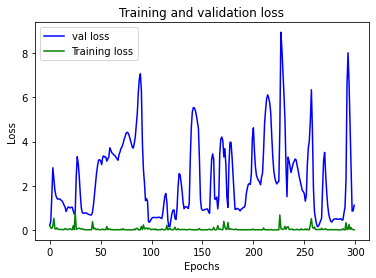

In [ ]:
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']
epochs = range(0,300)
plt.plot(epochs, loss_val, 'b', label='val loss')
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## make model and train sequently


In [ ]:
model = Our_ResNet_With_Dropout(shape = (100,66))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
model.summary()

In [ ]:
model = Our_ResNet(shape = (100,66))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
model.summary()

In [ ]:
acc_TSC = {}
for p in tqdm(range(20)):
  model = Our_ResNet(shape = (100,66))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
  history = model.fit(All_subjects_X_train[str(p)],All_subjects_y_train[str(p)],validation_data=(All_subjects_X_val[str(p)],All_subjects_y_val[str(p)]),epochs=300, batch_size=8, verbose=1)
  K.set_value(model.optimizer.learning_rate, 0.0005)
  history_2 = model.fit(All_subjects_X_train[str(p)],All_subjects_y_train[str(p)],validation_data=(All_subjects_X_val[str(p)],All_subjects_y_val[str(p)]), epochs=500, batch_size=8, verbose=1)
  _, accuracy = model.evaluate(All_subjects_X_test[str(p)],All_subjects_y_test[str(p)],batch_size=8, verbose=1)
  l = [history.history['loss'][-1],history.history['val_loss'][-1],history.history['val_accuracy'][-1],history_2.history['loss'][-1],history_2.history['val_loss'][-1],history_2.history['val_accuracy'][-1],accuracy]
  acc_TSC[str(p)]=l

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1/300
4/4 [==============================] - 6s 378ms/step - loss: 5.1395 - accuracy: 0.5714 - val_loss: 0.7851 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 1s 141ms/step - loss: 3.1846 - accuracy: 0.5714 - val_loss: 45.7523 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 1s 141ms/step - loss: 1.7149 - accuracy: 0.3571 - val_loss: 42.2104 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 1s 136ms/step - loss: 1.0379 - accuracy: 0.5714 - val_loss: 40.6518 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 1s 141ms/step - loss: 0.7007 - accuracy: 0.5000 - val_loss: 24.8410 - val_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 1s 153ms/step - loss: 0.6834 - accuracy: 0.5714 - val_loss: 12.4315 - val_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 1s 221ms/step - loss: 0.7391 - accuracy: 0.5714 - val_loss: 9.0291 - val_accuracy: 0.5000
Epoch 8/

  5%|▌         | 1/20 [08:49<2:47:47, 529.89s/it]

Epoch 1/300
4/4 [==============================] - 5s 305ms/step - loss: 7.4803 - accuracy: 0.3929 - val_loss: 0.9140 - val_accuracy: 0.6250
Epoch 2/300
4/4 [==============================] - 0s 113ms/step - loss: 1.6378 - accuracy: 0.6429 - val_loss: 88.6172 - val_accuracy: 0.6250
Epoch 3/300
4/4 [==============================] - 0s 109ms/step - loss: 0.9389 - accuracy: 0.5000 - val_loss: 118.2959 - val_accuracy: 0.6250
Epoch 4/300
4/4 [==============================] - 0s 115ms/step - loss: 0.7445 - accuracy: 0.5714 - val_loss: 104.1873 - val_accuracy: 0.6250
Epoch 5/300
4/4 [==============================] - 0s 118ms/step - loss: 0.8267 - accuracy: 0.5000 - val_loss: 62.6730 - val_accuracy: 0.6250
Epoch 6/300
4/4 [==============================] - 0s 112ms/step - loss: 0.8685 - accuracy: 0.4286 - val_loss: 36.7195 - val_accuracy: 0.6250
Epoch 7/300
4/4 [==============================] - 0s 110ms/step - loss: 0.8028 - accuracy: 0.6071 - val_loss: 16.3535 - val_accuracy: 0.6250
Epoch

 10%|█         | 2/20 [16:38<2:28:10, 493.89s/it]

Epoch 1/300
4/4 [==============================] - 5s 270ms/step - loss: 9.3912 - accuracy: 0.2500 - val_loss: 36.0315 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 0s 101ms/step - loss: 1.3786 - accuracy: 0.4643 - val_loss: 572.5944 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 0s 101ms/step - loss: 1.3551 - accuracy: 0.4643 - val_loss: 654.5237 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 0s 101ms/step - loss: 1.2085 - accuracy: 0.5357 - val_loss: 468.1835 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 0s 111ms/step - loss: 0.8626 - accuracy: 0.5357 - val_loss: 286.4850 - val_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 0s 100ms/step - loss: 1.1226 - accuracy: 0.4643 - val_loss: 166.5791 - val_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 0s 105ms/step - loss: 0.6870 - accuracy: 0.5357 - val_loss: 105.2184 - val_accuracy: 0.5000


 15%|█▌        | 3/20 [23:05<2:06:08, 445.21s/it]

Epoch 1/300
4/4 [==============================] - 4s 282ms/step - loss: 4.3668 - accuracy: 0.6071 - val_loss: 3.7265 - val_accuracy: 0.7500
Epoch 2/300
4/4 [==============================] - 0s 113ms/step - loss: 1.2705 - accuracy: 0.4643 - val_loss: 5.8247 - val_accuracy: 0.7500
Epoch 3/300
4/4 [==============================] - 0s 105ms/step - loss: 0.9081 - accuracy: 0.5357 - val_loss: 4.5893 - val_accuracy: 0.2500
Epoch 4/300
4/4 [==============================] - 0s 105ms/step - loss: 0.7316 - accuracy: 0.4643 - val_loss: 6.0251 - val_accuracy: 0.2500
Epoch 5/300
4/4 [==============================] - 0s 114ms/step - loss: 0.7551 - accuracy: 0.6071 - val_loss: 3.0575 - val_accuracy: 0.7500
Epoch 6/300
4/4 [==============================] - 0s 109ms/step - loss: 0.7350 - accuracy: 0.4643 - val_loss: 3.1048 - val_accuracy: 0.2500
Epoch 7/300
4/4 [==============================] - 0s 117ms/step - loss: 0.8235 - accuracy: 0.6071 - val_loss: 1.3008 - val_accuracy: 0.7500
Epoch 8/300
4

 20%|██        | 4/20 [29:53<1:54:48, 430.55s/it]

Epoch 1/300
4/4 [==============================] - 5s 267ms/step - loss: 2.9268 - accuracy: 0.6429 - val_loss: 36.5144 - val_accuracy: 0.6250
Epoch 2/300
4/4 [==============================] - 1s 126ms/step - loss: 5.0458 - accuracy: 0.2857 - val_loss: 254.5681 - val_accuracy: 0.6250
Epoch 3/300
4/4 [==============================] - 0s 122ms/step - loss: 1.7608 - accuracy: 0.4286 - val_loss: 656.4525 - val_accuracy: 0.6250
Epoch 4/300
4/4 [==============================] - 0s 117ms/step - loss: 0.9127 - accuracy: 0.5000 - val_loss: 703.6605 - val_accuracy: 0.6250
Epoch 5/300
4/4 [==============================] - 0s 117ms/step - loss: 0.9096 - accuracy: 0.5000 - val_loss: 746.3602 - val_accuracy: 0.6250
Epoch 6/300
4/4 [==============================] - 0s 119ms/step - loss: 1.2059 - accuracy: 0.5000 - val_loss: 340.7913 - val_accuracy: 0.6250
Epoch 7/300
4/4 [==============================] - 0s 119ms/step - loss: 0.7662 - accuracy: 0.4643 - val_loss: 109.0511 - val_accuracy: 0.6250


 25%|██▌       | 5/20 [36:41<1:45:32, 422.15s/it]

Epoch 1/300
4/4 [==============================] - 4s 274ms/step - loss: 5.0105 - accuracy: 0.4286 - val_loss: 1.5927 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 0s 105ms/step - loss: 1.3133 - accuracy: 0.3929 - val_loss: 71.5520 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 0s 118ms/step - loss: 1.1523 - accuracy: 0.3929 - val_loss: 150.1649 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 0s 115ms/step - loss: 0.8597 - accuracy: 0.6071 - val_loss: 90.3829 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 0s 115ms/step - loss: 0.7141 - accuracy: 0.4643 - val_loss: 62.7301 - val_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 0s 111ms/step - loss: 0.6743 - accuracy: 0.6071 - val_loss: 42.9271 - val_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 0s 110ms/step - loss: 0.6855 - accuracy: 0.6071 - val_loss: 21.2934 - val_accuracy: 0.5000
Epoch 

 30%|███       | 6/20 [44:46<1:43:29, 443.57s/it]

Epoch 1/300
4/4 [==============================] - 5s 468ms/step - loss: 5.6393 - accuracy: 0.5000 - val_loss: 17.0636 - val_accuracy: 0.7500
Epoch 2/300
4/4 [==============================] - 0s 106ms/step - loss: 4.7803 - accuracy: 0.4286 - val_loss: 115.5110 - val_accuracy: 0.7500
Epoch 3/300
4/4 [==============================] - 0s 117ms/step - loss: 1.4161 - accuracy: 0.5714 - val_loss: 181.7300 - val_accuracy: 0.7500
Epoch 4/300
4/4 [==============================] - 0s 113ms/step - loss: 1.0656 - accuracy: 0.4286 - val_loss: 153.0013 - val_accuracy: 0.7500
Epoch 5/300
4/4 [==============================] - 0s 116ms/step - loss: 1.1190 - accuracy: 0.5714 - val_loss: 91.6366 - val_accuracy: 0.7500
Epoch 6/300
4/4 [==============================] - 0s 109ms/step - loss: 0.7621 - accuracy: 0.4286 - val_loss: 46.8540 - val_accuracy: 0.7500
Epoch 7/300
4/4 [==============================] - 0s 105ms/step - loss: 0.8542 - accuracy: 0.3571 - val_loss: 28.9964 - val_accuracy: 0.7500
Epo

 35%|███▌      | 7/20 [51:31<1:33:24, 431.09s/it]

Epoch 1/300
4/4 [==============================] - 4s 292ms/step - loss: 4.4605 - accuracy: 0.5357 - val_loss: 13.9453 - val_accuracy: 0.3750
Epoch 2/300
4/4 [==============================] - 0s 112ms/step - loss: 3.9956 - accuracy: 0.4286 - val_loss: 320.9918 - val_accuracy: 0.3750
Epoch 3/300
4/4 [==============================] - 0s 115ms/step - loss: 1.3382 - accuracy: 0.6429 - val_loss: 277.9372 - val_accuracy: 0.3750
Epoch 4/300
4/4 [==============================] - 0s 117ms/step - loss: 1.4123 - accuracy: 0.4286 - val_loss: 245.1270 - val_accuracy: 0.3750
Epoch 5/300
4/4 [==============================] - 0s 114ms/step - loss: 0.9148 - accuracy: 0.5714 - val_loss: 157.4293 - val_accuracy: 0.3750
Epoch 6/300
4/4 [==============================] - 0s 111ms/step - loss: 0.8413 - accuracy: 0.4286 - val_loss: 67.7986 - val_accuracy: 0.3750
Epoch 7/300
4/4 [==============================] - 0s 114ms/step - loss: 0.7226 - accuracy: 0.4286 - val_loss: 47.3538 - val_accuracy: 0.3750
Ep

 40%|████      | 8/20 [58:19<1:24:42, 423.55s/it]

Epoch 1/300
4/4 [==============================] - 5s 305ms/step - loss: 7.3378 - accuracy: 0.4286 - val_loss: 3.4598 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 1s 125ms/step - loss: 1.4613 - accuracy: 0.5000 - val_loss: 111.8424 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 1s 138ms/step - loss: 1.0745 - accuracy: 0.5714 - val_loss: 336.7872 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 0s 122ms/step - loss: 0.9257 - accuracy: 0.4286 - val_loss: 296.6319 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 1s 122ms/step - loss: 0.6766 - accuracy: 0.6071 - val_loss: 260.4280 - val_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 1s 131ms/step - loss: 0.7781 - accuracy: 0.3571 - val_loss: 211.2844 - val_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 1s 131ms/step - loss: 0.6106 - accuracy: 0.7143 - val_loss: 193.2420 - val_accuracy: 0.5000
E

 45%|████▌     | 9/20 [1:05:27<1:17:56, 425.18s/it]

Epoch 1/300
4/4 [==============================] - 4s 277ms/step - loss: 5.0634 - accuracy: 0.5000 - val_loss: 8.7632 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 0s 115ms/step - loss: 3.0719 - accuracy: 0.3571 - val_loss: 329.8445 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 0s 111ms/step - loss: 1.0934 - accuracy: 0.5000 - val_loss: 992.0331 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 0s 110ms/step - loss: 0.8873 - accuracy: 0.5000 - val_loss: 767.1122 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 0s 106ms/step - loss: 0.8514 - accuracy: 0.5000 - val_loss: 496.3816 - val_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 0s 108ms/step - loss: 0.7782 - accuracy: 0.5000 - val_loss: 302.4117 - val_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 0s 112ms/step - loss: 0.7500 - accuracy: 0.5000 - val_loss: 165.3794 - val_accuracy: 0.5000
E

 50%|█████     | 10/20 [1:13:05<1:12:33, 435.34s/it]

Epoch 1/300
4/4 [==============================] - 4s 282ms/step - loss: 2.6915 - accuracy: 0.3571 - val_loss: 37.2190 - val_accuracy: 0.3750
Epoch 2/300
4/4 [==============================] - 0s 119ms/step - loss: 2.2028 - accuracy: 0.5357 - val_loss: 104.1234 - val_accuracy: 0.3750
Epoch 3/300
4/4 [==============================] - 0s 112ms/step - loss: 1.1346 - accuracy: 0.5357 - val_loss: 210.2583 - val_accuracy: 0.3750
Epoch 4/300
4/4 [==============================] - 0s 120ms/step - loss: 1.0279 - accuracy: 0.3929 - val_loss: 84.8607 - val_accuracy: 0.3750
Epoch 5/300
4/4 [==============================] - 0s 117ms/step - loss: 0.9548 - accuracy: 0.3929 - val_loss: 66.0503 - val_accuracy: 0.3750
Epoch 6/300
4/4 [==============================] - 0s 117ms/step - loss: 0.7618 - accuracy: 0.5357 - val_loss: 25.0240 - val_accuracy: 0.3750
Epoch 7/300
4/4 [==============================] - 0s 116ms/step - loss: 0.7010 - accuracy: 0.5357 - val_loss: 11.2129 - val_accuracy: 0.3750
Epoc

 55%|█████▌    | 11/20 [1:20:00<1:04:20, 428.97s/it]

Epoch 1/300
4/4 [==============================] - 5s 276ms/step - loss: 6.3786 - accuracy: 0.5000 - val_loss: 82.5148 - val_accuracy: 0.6250
Epoch 2/300
4/4 [==============================] - 1s 126ms/step - loss: 2.1938 - accuracy: 0.5000 - val_loss: 762.1355 - val_accuracy: 0.6250
Epoch 3/300
4/4 [==============================] - 0s 113ms/step - loss: 1.2094 - accuracy: 0.5357 - val_loss: 388.8845 - val_accuracy: 0.6250
Epoch 4/300
4/4 [==============================] - 0s 109ms/step - loss: 1.1039 - accuracy: 0.6071 - val_loss: 569.5526 - val_accuracy: 0.6250
Epoch 5/300
4/4 [==============================] - 0s 108ms/step - loss: 1.0586 - accuracy: 0.3929 - val_loss: 649.1118 - val_accuracy: 0.6250
Epoch 6/300
4/4 [==============================] - 0s 102ms/step - loss: 0.7781 - accuracy: 0.5714 - val_loss: 360.8623 - val_accuracy: 0.6250
Epoch 7/300
4/4 [==============================] - 0s 110ms/step - loss: 0.7197 - accuracy: 0.6071 - val_loss: 340.6117 - val_accuracy: 0.6250


 60%|██████    | 12/20 [1:27:49<58:49, 441.20s/it]  

Epoch 1/300
4/4 [==============================] - 6s 346ms/step - loss: 5.6713 - accuracy: 0.5357 - val_loss: 2.7965 - val_accuracy: 0.3750
Epoch 2/300
4/4 [==============================] - 1s 152ms/step - loss: 2.3912 - accuracy: 0.3929 - val_loss: 42.4630 - val_accuracy: 0.6250
Epoch 3/300
4/4 [==============================] - 1s 144ms/step - loss: 1.0615 - accuracy: 0.4643 - val_loss: 76.5246 - val_accuracy: 0.6250
Epoch 4/300
4/4 [==============================] - 1s 137ms/step - loss: 1.1192 - accuracy: 0.5357 - val_loss: 64.1568 - val_accuracy: 0.6250
Epoch 5/300
4/4 [==============================] - 1s 140ms/step - loss: 0.8734 - accuracy: 0.5357 - val_loss: 10.9052 - val_accuracy: 0.6250
Epoch 6/300
4/4 [==============================] - 1s 158ms/step - loss: 0.8702 - accuracy: 0.4643 - val_loss: 17.5354 - val_accuracy: 0.6250
Epoch 7/300
4/4 [==============================] - 1s 149ms/step - loss: 0.8832 - accuracy: 0.5357 - val_loss: 12.6623 - val_accuracy: 0.6250
Epoch 8

 65%|██████▌   | 13/20 [1:35:58<53:09, 455.60s/it]

Epoch 1/300
4/4 [==============================] - 5s 271ms/step - loss: 5.4171 - accuracy: 0.4643 - val_loss: 17.7979 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 0s 108ms/step - loss: 1.7227 - accuracy: 0.4643 - val_loss: 532.2921 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 0s 120ms/step - loss: 1.5261 - accuracy: 0.5000 - val_loss: 1544.9758 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 0s 113ms/step - loss: 0.7329 - accuracy: 0.5000 - val_loss: 1452.0547 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 0s 116ms/step - loss: 0.8052 - accuracy: 0.6071 - val_loss: 1182.5758 - val_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 0s 112ms/step - loss: 0.7358 - accuracy: 0.3929 - val_loss: 693.0434 - val_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 0s 110ms/step - loss: 0.7411 - accuracy: 0.6071 - val_loss: 427.2263 - val_accuracy: 0.50

 70%|███████   | 14/20 [1:43:47<45:57, 459.58s/it]

Epoch 1/300
4/4 [==============================] - 4s 275ms/step - loss: 6.2773 - accuracy: 0.4643 - val_loss: 1.9892 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 0s 116ms/step - loss: 1.8243 - accuracy: 0.4286 - val_loss: 125.4700 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 0s 114ms/step - loss: 0.8703 - accuracy: 0.5714 - val_loss: 273.3495 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 0s 115ms/step - loss: 1.3235 - accuracy: 0.5000 - val_loss: 174.6255 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 0s 113ms/step - loss: 1.4448 - accuracy: 0.5000 - val_loss: 111.0498 - val_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 0s 112ms/step - loss: 1.0079 - accuracy: 0.3571 - val_loss: 90.6326 - val_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 0s 113ms/step - loss: 0.7692 - accuracy: 0.5357 - val_loss: 27.3734 - val_accuracy: 0.5000
Epo

 75%|███████▌  | 15/20 [1:51:35<38:30, 462.19s/it]

Epoch 1/300
4/4 [==============================] - 5s 294ms/step - loss: 5.4131 - accuracy: 0.4286 - val_loss: 1.4226 - val_accuracy: 0.7500
Epoch 2/300
4/4 [==============================] - 1s 141ms/step - loss: 1.9052 - accuracy: 0.5000 - val_loss: 247.0411 - val_accuracy: 0.7500
Epoch 3/300
4/4 [==============================] - 1s 131ms/step - loss: 0.6044 - accuracy: 0.6071 - val_loss: 597.5539 - val_accuracy: 0.7500
Epoch 4/300
4/4 [==============================] - 0s 115ms/step - loss: 1.3120 - accuracy: 0.4643 - val_loss: 571.7175 - val_accuracy: 0.7500
Epoch 5/300
4/4 [==============================] - 0s 116ms/step - loss: 0.8205 - accuracy: 0.5000 - val_loss: 259.9286 - val_accuracy: 0.7500
Epoch 6/300
4/4 [==============================] - 0s 114ms/step - loss: 0.7610 - accuracy: 0.4643 - val_loss: 124.2615 - val_accuracy: 0.7500
Epoch 7/300
4/4 [==============================] - 0s 118ms/step - loss: 0.8270 - accuracy: 0.3929 - val_loss: 65.6620 - val_accuracy: 0.7500
Ep

 80%|████████  | 16/20 [1:59:24<30:56, 464.19s/it]

Epoch 1/300
4/4 [==============================] - 4s 264ms/step - loss: 4.1510 - accuracy: 0.6071 - val_loss: 10.8164 - val_accuracy: 0.6250
Epoch 2/300
4/4 [==============================] - 0s 115ms/step - loss: 2.4472 - accuracy: 0.3929 - val_loss: 194.8837 - val_accuracy: 0.6250
Epoch 3/300
4/4 [==============================] - 0s 116ms/step - loss: 1.0339 - accuracy: 0.4643 - val_loss: 381.1307 - val_accuracy: 0.6250
Epoch 4/300
4/4 [==============================] - 0s 116ms/step - loss: 0.7562 - accuracy: 0.5357 - val_loss: 397.5609 - val_accuracy: 0.6250
Epoch 5/300
4/4 [==============================] - 0s 112ms/step - loss: 0.7111 - accuracy: 0.5000 - val_loss: 276.6220 - val_accuracy: 0.6250
Epoch 6/300
4/4 [==============================] - 0s 116ms/step - loss: 0.6990 - accuracy: 0.5000 - val_loss: 204.5699 - val_accuracy: 0.6250
Epoch 7/300
4/4 [==============================] - 0s 115ms/step - loss: 0.7306 - accuracy: 0.5357 - val_loss: 129.9729 - val_accuracy: 0.6250


 85%|████████▌ | 17/20 [2:08:12<24:10, 483.44s/it]

Epoch 1/300
4/4 [==============================] - 6s 354ms/step - loss: 5.8157 - accuracy: 0.5000 - val_loss: 5.2595 - val_accuracy: 0.3750
Epoch 2/300
4/4 [==============================] - 1s 135ms/step - loss: 2.5372 - accuracy: 0.5000 - val_loss: 8.8109 - val_accuracy: 0.6250
Epoch 3/300
4/4 [==============================] - 1s 142ms/step - loss: 1.8995 - accuracy: 0.4286 - val_loss: 39.8331 - val_accuracy: 0.3750
Epoch 4/300
4/4 [==============================] - 0s 124ms/step - loss: 0.7235 - accuracy: 0.6429 - val_loss: 6.0006 - val_accuracy: 0.6250
Epoch 5/300
4/4 [==============================] - 1s 126ms/step - loss: 1.2968 - accuracy: 0.4286 - val_loss: 17.5075 - val_accuracy: 0.3750
Epoch 6/300
4/4 [==============================] - 0s 117ms/step - loss: 0.7268 - accuracy: 0.5714 - val_loss: 14.8822 - val_accuracy: 0.3750
Epoch 7/300
4/4 [==============================] - 1s 125ms/step - loss: 0.8838 - accuracy: 0.5714 - val_loss: 1.2652 - val_accuracy: 0.3750
Epoch 8/30

 90%|█████████ | 18/20 [2:16:00<15:57, 478.69s/it]

Epoch 1/300
4/4 [==============================] - 4s 332ms/step - loss: 2.5499 - accuracy: 0.6071 - val_loss: 176.5008 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 0s 118ms/step - loss: 2.0636 - accuracy: 0.5000 - val_loss: 1282.5146 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 0s 113ms/step - loss: 1.6296 - accuracy: 0.4286 - val_loss: 352.8212 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 0s 114ms/step - loss: 0.9037 - accuracy: 0.5000 - val_loss: 878.9843 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 0s 113ms/step - loss: 1.0468 - accuracy: 0.4643 - val_loss: 847.8952 - val_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 0s 120ms/step - loss: 0.7093 - accuracy: 0.5714 - val_loss: 628.2236 - val_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 0s 113ms/step - loss: 0.7650 - accuracy: 0.4643 - val_loss: 293.7294 - val_accuracy: 0.500

 95%|█████████▌| 19/20 [2:25:48<08:31, 511.70s/it]

Epoch 1/300
4/4 [==============================] - 8s 474ms/step - loss: 3.5302 - accuracy: 0.4643 - val_loss: 25.2363 - val_accuracy: 0.5000
Epoch 2/300
4/4 [==============================] - 1s 175ms/step - loss: 1.3847 - accuracy: 0.3214 - val_loss: 226.2573 - val_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 1s 209ms/step - loss: 1.2215 - accuracy: 0.3571 - val_loss: 243.3080 - val_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 1s 167ms/step - loss: 0.7906 - accuracy: 0.5000 - val_loss: 184.6165 - val_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 1s 186ms/step - loss: 0.7823 - accuracy: 0.4286 - val_loss: 80.2874 - val_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 1s 177ms/step - loss: 0.7104 - accuracy: 0.4286 - val_loss: 52.6862 - val_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 1s 210ms/step - loss: 0.6983 - accuracy: 0.5714 - val_loss: 31.3115 - val_accuracy: 0.5000
Epo

100%|██████████| 20/20 [2:34:40<00:00, 464.02s/it]


In [ ]:
for p in range(20):
  print(p)
  print(acc_TSC[str(p)])

0
[7.663452095130197e-08, 26.288061141967773, 0.5, 0.0008486160659231246, 3.641785144805908, 0.5, 0.5]
1
[0.017311539500951767, 127.41560363769531, 0.375, 0.00206745439209044, 2.233102321624756, 0.625, 0.75]
2
[0.002931114286184311, 54.388057708740234, 0.5, 0.08146821707487106, 7.087473392486572, 0.375, 0.75]
3
[0.08233258873224258, 4.172876358032227, 0.25, 0.011099455878138542, 7.585292339324951, 0.375, 0.75]
4
[0.05215251073241234, 4.569894313812256, 0.25, 0.001589244813658297, 5.015691757202148, 0.375, 0.25]
5
[0.14299055933952332, 75.42913818359375, 0.5, 0.001634266460314393, 3.275552749633789, 0.5, 1.0]
6
[0.021504094824194908, 8.76045036315918, 0.75, 0.01821010187268257, 10.464534759521484, 0.625, 0.75]
7
[0.036678534001111984, 11.898653030395508, 0.625, 0.4960651695728302, 6.03138542175293, 0.375, 1.0]
8
[0.05383293703198433, 38.55132293701172, 0.5, 0.0005853608017787337, 3.1521215438842773, 0.625, 1.0]
9
[0.04252076894044876, 98.4632339477539, 0.5, 0.0016121239168569446, 4.8123

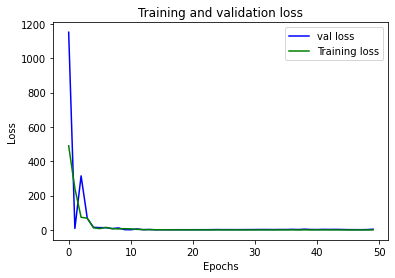

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_val, 'b', label='val loss')
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()